In [26]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Azerbaijan Grand Prix', 'FP2')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]





req         WARNING 	DEFAULT CACHE ENABLED! (4.37 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Practice 2 [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4',

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
2,0 days 00:20:12.567000,VER,1,0 days 00:01:45.563000,3.0,2.0,NaT,NaT,0 days 00:00:37.294000,0 days 00:00:42.603000,...,True,Red Bull Racing,0 days 00:18:27.004000,2024-09-13 13:04:27.080,1,NaN,False,,False,True
3,0 days 00:22:23.051000,VER,1,0 days 00:02:10.484000,4.0,2.0,NaT,NaT,0 days 00:00:52.637000,0 days 00:00:51.081000,...,True,Red Bull Racing,0 days 00:20:12.567000,2024-09-13 13:06:12.643,1,NaN,False,,False,True
4,0 days 00:24:08.103000,VER,1,0 days 00:01:45.052000,5.0,2.0,NaT,NaT,0 days 00:00:37.225000,0 days 00:00:42.370000,...,True,Red Bull Racing,0 days 00:22:23.051000,2024-09-13 13:08:23.127,12,NaN,False,,False,True
5,0 days 00:26:32.989000,VER,1,0 days 00:02:24.886000,6.0,2.0,NaT,NaT,0 days 00:00:55.479000,0 days 00:01:01.945000,...,True,Red Bull Racing,0 days 00:24:08.103000,2024-09-13 13:10:08.179,1,NaN,False,,False,True
8,0 days 00:40:22.922000,VER,1,0 days 00:01:44.029000,9.0,3.0,NaT,NaT,0 days 00:00:36.640000,0 days 00:00:41.797000,...,False,Red Bull Racing,0 days 00:38:38.893000,2024-09-13 13:24:38.969,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0 days 01:07:23.838000,PIA,81,0 days 00:01:48.557000,19.0,4.0,NaT,NaT,0 days 00:00:39.061000,0 days 00:00:44.130000,...,False,McLaren,0 days 01:05:35.281000,2024-09-13 13:51:35.357,12,NaN,False,,False,True
464,0 days 01:09:13.627000,PIA,81,0 days 00:01:49.789000,20.0,4.0,NaT,NaT,0 days 00:00:39.761000,0 days 00:00:44.357000,...,False,McLaren,0 days 01:07:23.838000,2024-09-13 13:53:23.914,1,NaN,False,,False,True
465,0 days 01:11:03.474000,PIA,81,0 days 00:01:49.847000,21.0,4.0,NaT,NaT,0 days 00:00:39.273000,0 days 00:00:44.759000,...,False,McLaren,0 days 01:09:13.627000,2024-09-13 13:55:13.703,1,NaN,False,,False,True
466,0 days 01:12:53.482000,PIA,81,0 days 00:01:50.008000,22.0,4.0,NaT,NaT,0 days 00:00:39.209000,0 days 00:00:44.701000,...,False,McLaren,0 days 01:11:03.474000,2024-09-13 13:57:03.550,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


In [7]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

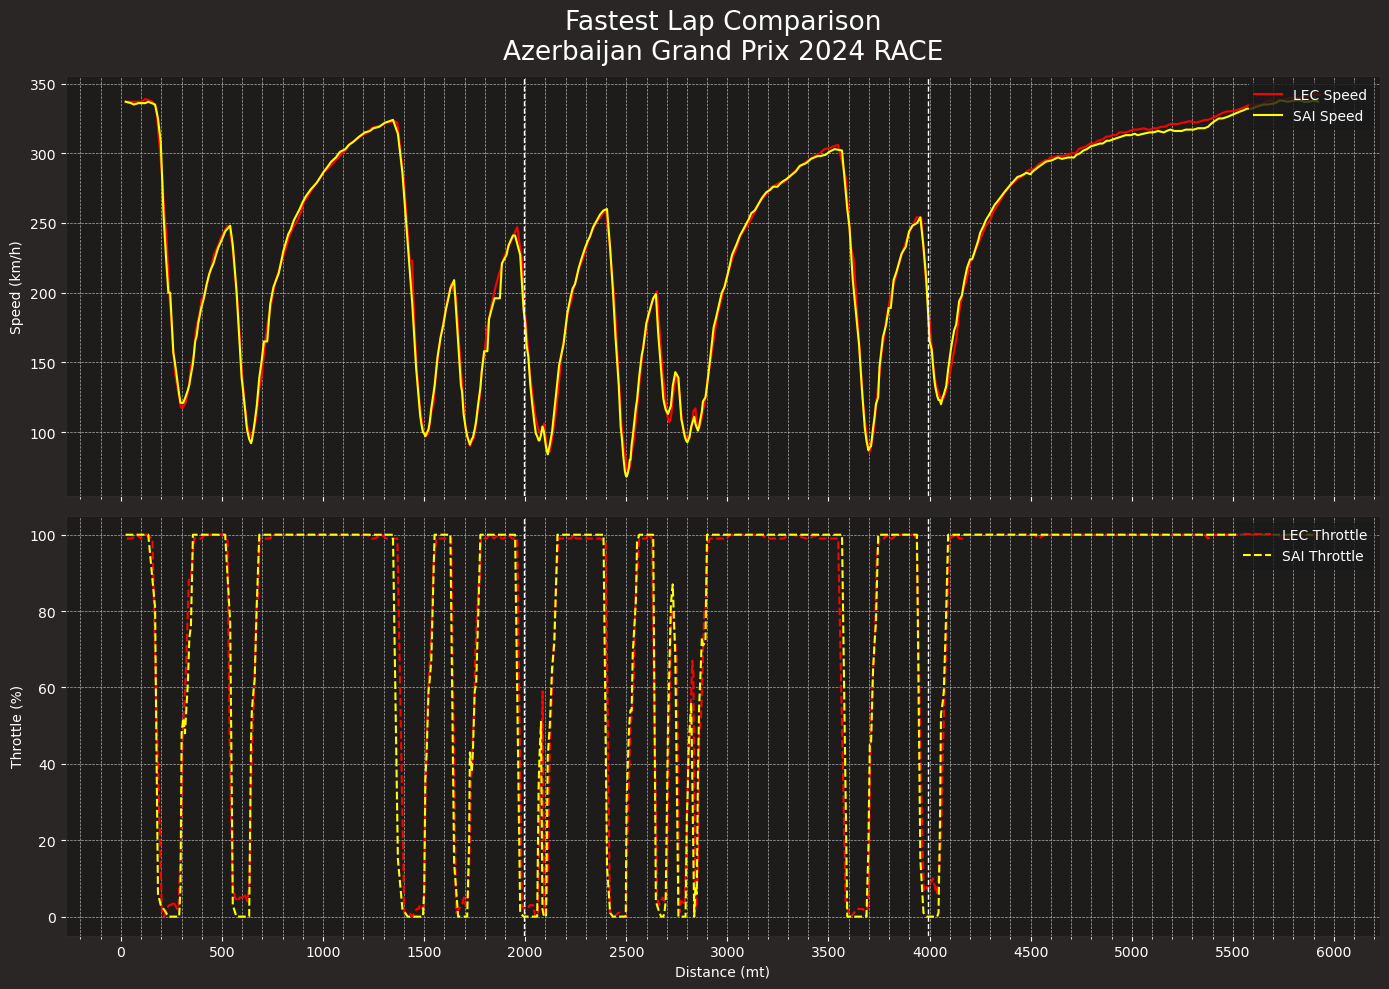

In [8]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_driver('LEC').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_driver('SAI').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()

# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(SAI_tel['Distance'], SAI_tel['Speed'], color='yellow', label='SAI Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} RACE", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(SAI_tel['Distance'], SAI_tel['Throttle'], color='yellow', linestyle='--', label='SAI Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


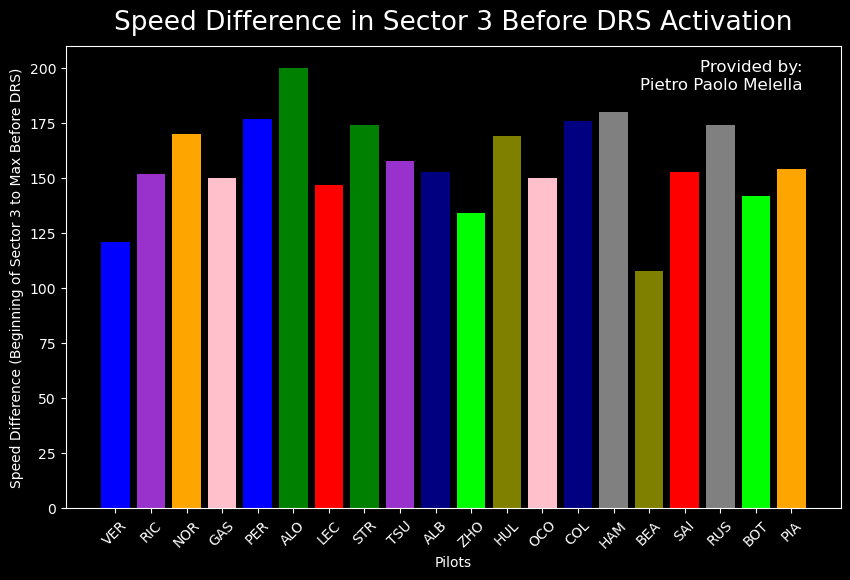

<Figure size 640x480 with 0 Axes>

In [9]:
speed_diff_t3_before_drs_activation= {}

for pilot in drivers:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #selecting the data starting for the sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance']>sector2_end_distance]
    #selecting the data from the begging of sector to the last max speed with drs closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()
    #computing the different 
    speed_diff_t3_before_drs_activation[pilot] = pilot_car_data_t3_drs_closed['Speed'].max() - pilot_car_data_t3_drs_closed['Speed'][0]



# Extract the pilots and speeds
pilots = list(speed_diff_t3_before_drs_activation.keys())
speeds = list(speed_diff_t3_before_drs_activation.values())
pilot_colors = [colors.get(pilot, 'black') for pilot in pilots]  # Default to black if color not found

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(pilots, speeds, color=pilot_colors)

# Add labels and title
plt.xlabel('Pilots')
plt.ylabel('Speed Difference (Beginning of Sector 3 to Max Before DRS)')
plt.title('Speed Difference in Sector 3 Before DRS Activation')

# Rotate pilot labels for better readability
plt.xticks(rotation=45)

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Show the plot
plt.show()

# Show plot
plt.tight_layout()
plt.show()

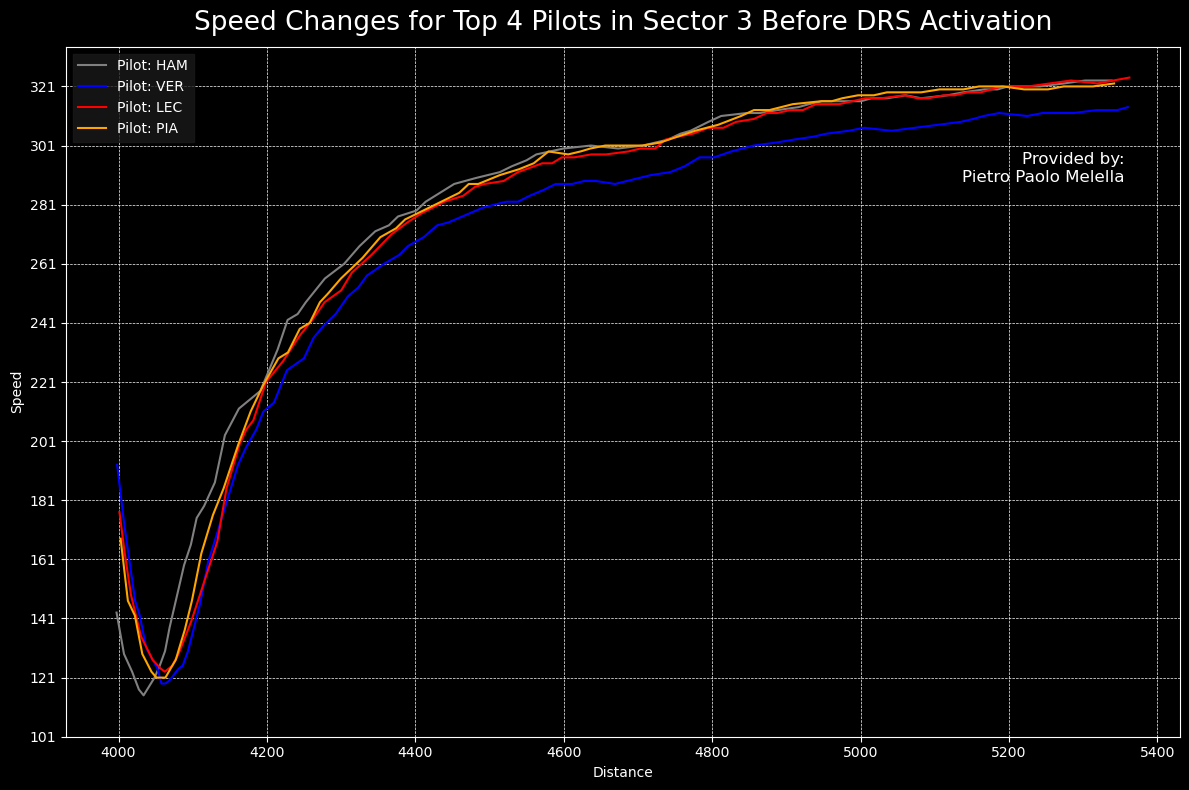

In [18]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

drivers_4 =['HAM', 'VER', 'LEC','PIA']

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    # Selecting the data starting from sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance'] > sector2_end_distance]
    # Selecting the data from the beginning of sector 3 until the max speed with DRS closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t3_drs_closed['Distance'], pilot_car_data_t3_drs_closed['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 4 Pilots in Sector 3 Before DRS Activation')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_t3_drs_closed['Speed'].max(), 100)) + 1, int(max(pilot_car_data_t3_drs_closed['Speed'].max(), 100)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

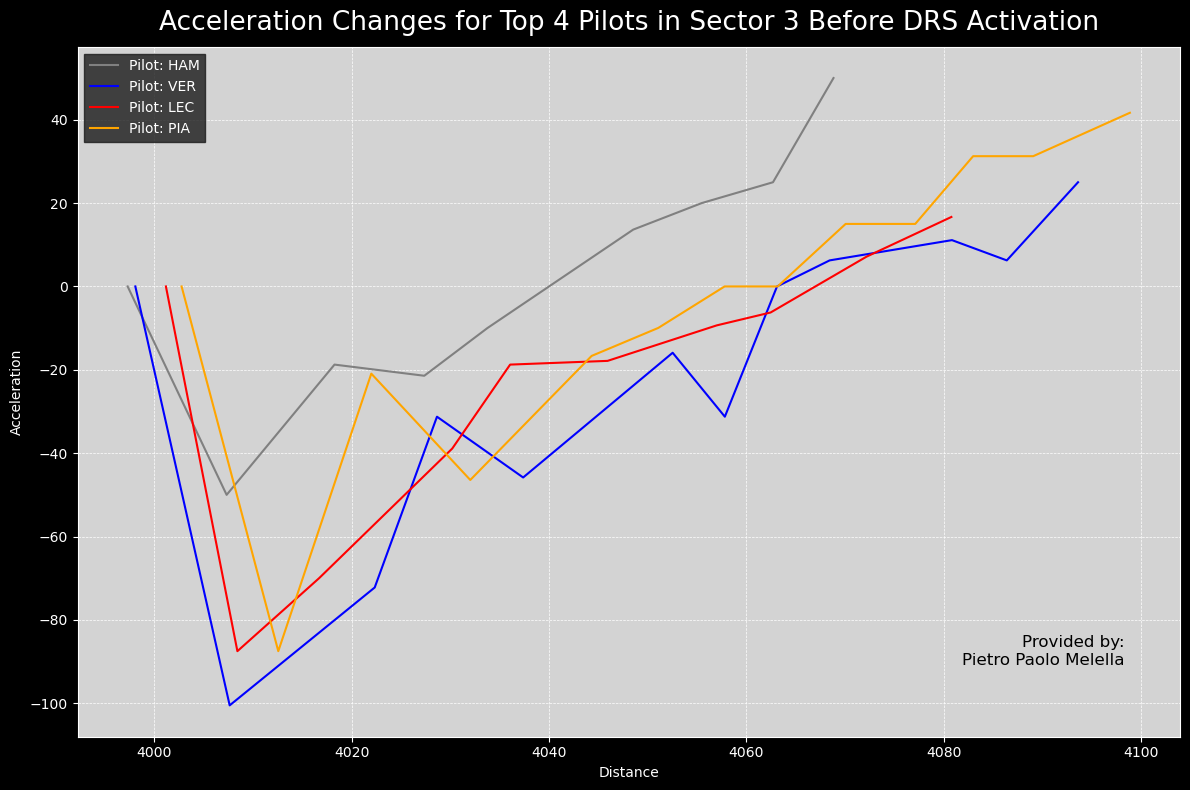

In [19]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')
# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_driver(pilot).pick_fastest()
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    # Selecting the data starting from sector 3
    pilot_car_data_t3 = pilot_car_data[pilot_car_data['Distance'] > sector2_end_distance]
    # Selecting the data from the beginning of sector 3 until the max speed with DRS closed
    pilot_car_data_t3_drs_closed = pilot_car_data_t3[(pilot_car_data_t3['DRS'] > 0) & (pilot_car_data_t3['DRS'] < 9)].reset_index()

    pilot_car_data_t3_drs_closed['Acceleration'] = ((pilot_car_data_t3_drs_closed['Speed'].diff().fillna(0))  / pilot_car_data_t3_drs_closed['SessionTime'].dt.total_seconds().diff().fillna(0).fillna(0)).fillna(0)
    
    pilot_car_data_t3_drs_closed_filtered = pilot_car_data_t3_drs_closed[pilot_car_data_t3_drs_closed['Throttle']<99].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_t3_drs_closed_filtered['Distance'], pilot_car_data_t3_drs_closed_filtered['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")


# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 4 Pilots in Sector 3 Before DRS Activation')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()